<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista3_Exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O código abaixo gera um dataset com 40 séries de treinamento e 16 séries de teste e o salva em um arquivo .h5. Esse dataset é composto por 4 polinômios diferentes (t^0; t^1; t^2; t^3) mais ruido gaussiano.

(224, 30)


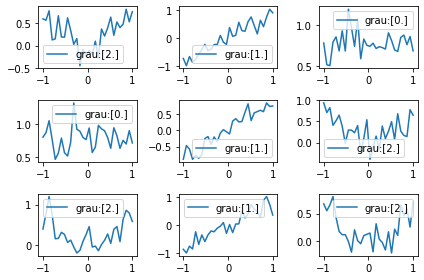

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

#gera o data set com as funções t^0; t^1; t^2; t^3
N_class=4
s_p=30                                                                           #quantos pontos os dados de entrada tem
s_d=N_class*10                                                                   #quantos exemplos tem meu Dtrain
s_t=N_class*4                                                                    #quantos exemplos para teste
p_r = 0.2                                                                        #porcentagem de ruido 
t=np.linspace(-1,1,s_p)                                                          #define a escala de tempo

#dados de treinamento e teste
xtudo = np.empty((0,s_p),float)                                                  #inicializa as entradas
ytudo = np.empty((0,1),float)
for q_pol in range(0,N_class):
  matriz_polinomios=(1-p_r)*(np.ones([s_d+s_t,1])*t**q_pol)                      #cria os vetores
  matriz_pol_com_ruido=matriz_polinomios+p_r*np.random.normal(0,1,[s_d+s_t,s_p])
  xtudo = np.append(xtudo, matriz_pol_com_ruido, axis=0)
  matriz_graus = np.ones([s_d+s_t,1])*q_pol
  ytudo = np.append(ytudo, matriz_graus,axis=0)
tudo = np.append(xtudo, ytudo, axis=1)
tudo_misturado=tf.random.shuffle(tudo, seed=None, name=None)
lista_tudo_misturado=np.split(tudo_misturado, [s_p,s_p+1], axis=1)
xdata=lista_tudo_misturado[0]
ydata=lista_tudo_misturado[1]
print(xtudo.shape)

#mostra alguns dados
plt.figure()
for nn in range (0,9):
  plt.subplot(3,3,nn+1)
  plt.plot(t,xdata[nn,:])
  plt.legend(['grau:'+str(ydata[nn])])
plt.tight_layout()

#salva o dataset
with h5py.File('poli_data_set.h5','w') as hf:
   hf.create_dataset("tempo", data=t)
   hf.create_dataset("xdata", data=xdata)
   hf.create_dataset("ydata", data=ydata)
   hf.create_dataset("data_info", data=[s_p,s_d,s_t,N_class])

a) Crie e treine uma rede neural para classificação multi-classe para identificar esses polinômios para p_r=0,2.

dados do arquivo: ['data_info', 'tempo', 'xdata', 'ydata']
numero de exemplos de treinamento: 40.0
numero de exemplos de teste: 16


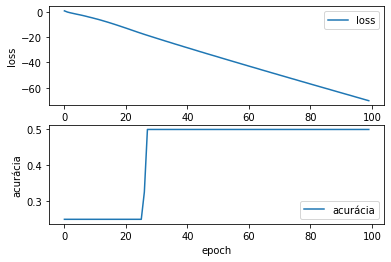

7/7 [==============================] - 0s 2ms/step - loss: -70.7729 - accuracy: 0.5000
Accuracy: 50.00
data pred= [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1.

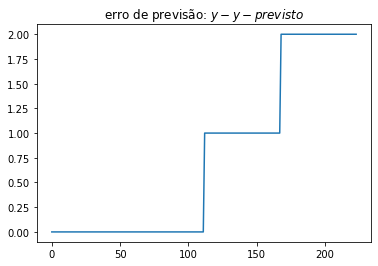

In [38]:
#Código da rede neural: parte 1
#importanto bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py

#carrega o dataset de "poli_data_set.h5"
with h5py.File('poli_data_set.h5', 'r') as hf:
  print('dados do arquivo:',list(hf.keys()))
with h5py.File('poli_data_set.h5','r') as hf:
  x_train=hf['xdata'][:]
  y_train=hf['ydata'][:]
  #x_test=hf['xteste'][:]
  #y_test=hf['yteste'][:]
  [s_p,s_d,s_t,N_class]=hf['data_info'][:]
print('numero de exemplos de treinamento:', 25+(0.5)*s_p)
print('numero de exemplos de teste:', s_t)

#Código da rede neural: parte 2
#define a rede neural 'keras model'
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=s_p, activation='sigmoid'))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#compila a rede neural
opt=tf.keras.optimizers.Adam(learning_rate=0.05);
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#treina a rede neural com o data set
history=model.fit(x_train, y_train, batch_size=2*s_d, epochs=100, verbose=0)
#mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(['acurácia'],loc='lower right')
plt.show()

#Código da rede neural: parte 3
#faz previsões com a rede treinada
y_pred=model.predict(xtudo)
#calcula a accurácia do teste
_,accuracy=model.evaluate(xtudo, ytudo)
print('Accuracy: %.2f'%(accuracy*100))
#mostra os resultados esperados e os alcançados lado a lado
print('data pred=', np.concatenate((ytudo, np.around(y_pred)), axis=1))
#faz o gráfico do erro de previsão
plt.figure()
plt.plot(ytudo-np.around(y_pred))
plt.title('erro de previsão: $y-y-{previsto}$')
plt.show()

b) Mantenha a rede como está e altere a porcentagem de ruido p_r, e calculando a accurária dos teste faça um gráfico da acuraria em função de p_r;

In [ ]:
#inserir código